<a href="https://colab.research.google.com/github/JJThoms1/end-to-end-second-hand-car-sales-regression/blob/main/end_to_end_second_hand_car_sales_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🚘 Predicting the sale of Second Hand Cars Using Machine Learning

In this notebook, I'll be going through examples of Machine Learning with the goal of predicting the sale price of Second Hand Cars.


### 1. Problem Definition

* How well can we predict the future sale price of a our second hand car, given its characteristics and previous examples of how much similar our second hand cars have been sold for?

### 2. Exploration and Preprocessing

The data is downloaded from the Kaggle BlueBook for Second Hand Car Sales:
https://www.kaggle.com/datasets/devantltd/analysing-second-hand-car-sales-data?select=second_hand_car_sales.csv

* We begin by exploring the dataset of 50,000 car sale records to understand the features and their distributions.

* Perform data cleaning and preprocessing steps such as handling missing values, encoding categorical variables, and scaling numerical features for modeling.

### 3. Regression Model with Single Numerical Input Features

* Start by implementing regression models using single numerical input features like mileage, engine size, and vehicle model year to predict car prices.
* Analyze the relationships between car prices and these numerical factors to identify the most influential variables using linear and non-linear models.


### 4. Regression Model with Multiple Numerical Input Features

* Expand our analysis by incorporating multiple numerical input parameters such as year of manufacture and kilometers achieved to enhance the predictive performance.
* Evaluate how considering multiple factors simultaneously impacts the accuracy of price predictions using regression models.


### 5. Regression Model with Categorical Variables

* Enhance our prediction models by including categorical variables like manufacturer and model into the regression analysis.
* Assess the effectiveness of incorporating categorical variables in predicting car prices and analyze how it complements the numerical features.


### 6. Artificial Neural Network (ANN) Model

* Implement an Artificial Neural Network (ANN) model to capture complex relationships within the dataset and predict car prices.
* Fine-tune the architecture and hyperparameters of the ANN for optimal performance and showcase its flexibility in handling complex datasets.


### 7. Model Comparison and Conclusion

* Compare the performance of different supervised learning models including Random Forest Regressor for forecasting car prices.
* Evaluate the evaluation metrics and visualizations to determine the most efficient model for predicting car prices based on both numerical and categorical variables.


### 8. k-Means Clustering Algorithm

* Explore unsupervised learning using the k-Means clustering algorithm to identify clusters within the car sales dataset.
* Determine the optimal number of clusters using evaluation metrics like silhouette score and analyze critical variables influencing cluster segmentation.


### 9. Comparison with Other Clustering Algorithms

* Compare the outcomes of k-Means clustering with other techniques such as DBSCAN and hierarchical clustering to assess clustering performance.
* Evaluate the effectiveness of different clustering algorithms in segmenting the dataset and highlight the strengths of each method.





In [32]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [33]:
# import and load datasets
df = pd.read_csv("/content/drive/MyDrive/second_hand_car_sales.csv")

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         50000 non-null  object 
 1   Model                50000 non-null  object 
 2   Engine Size (L)      50000 non-null  float64
 3   Fuel Type            50000 non-null  object 
 4   Year of Manufacture  50000 non-null  int64  
 5   Mileage              50000 non-null  int64  
 6   Price (£)            50000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 2.7+ MB


In [35]:
df.isna()

,Manufacturer,Model,Engine Size (L),Fuel Type,Year of Manufacture,Mileage,Price (£)
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
49995,False,False,False,False,False,False,False
49996,False,False,False,False,False,False,False
49997,False,False,False,False,False,False,False
49998,False,False,False,False,False,False,False


In [36]:
df.columns

Index(['Manufacturer', 'Model', 'Engine Size (L)', 'Fuel Type',
       'Year of Manufacture', 'Mileage', 'Price (£)'],
      dtype='object')

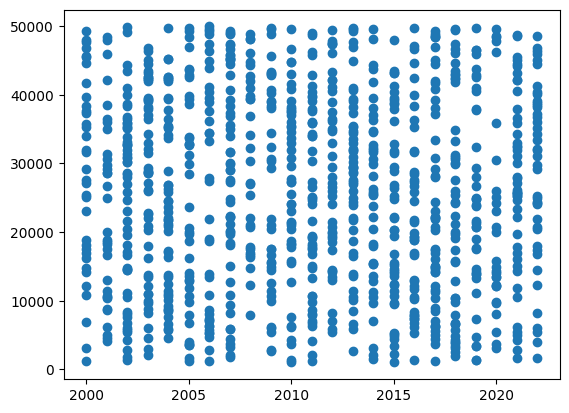

In [37]:
fig, ax = plt.subplots()
ax.scatter(df["Year of Manufacture"][:1000], df["Price (£)"][:1000]);

In [38]:
df.Manufacturer[:1000]

0      Mercedes-Benz
1             Toyota
2               Audi
3             Nissan
4      Mercedes-Benz
           ...      
995            Tesla
996             Ford
997           Toyota
998            Tesla
999            Tesla
Name: Manufacturer, Length: 1000, dtype: object

In [39]:
df.Manufacturer.dtype

dtype('O')

In [40]:
df.head()

,Manufacturer,Model,Engine Size (L),Fuel Type,Year of Manufacture,Mileage,Price (£)
0,Mercedes-Benz,Cruze,1.418475,Electric,2013,61837,34792
1,Toyota,A4,4.492330,Electric,2003,128993,27129
2,Audi,C-Class,4.739375,Electric,2000,81362,29141
3,Nissan,Model 3,3.128423,Petrol,2011,168204,24731
4,Mercedes-Benz,Golf,1.650279,Diesel,2006,119405,27493


Make a copy of the original DataFrame

We make a copy of the original dataframe so when we manipulate the copy, we've still got our original data.


In [41]:
# Make a copy
df_tmp = df.copy()

In [42]:
df_tmp.head()

,Manufacturer,Model,Engine Size (L),Fuel Type,Year of Manufacture,Mileage,Price (£)
0,Mercedes-Benz,Cruze,1.418475,Electric,2013,61837,34792
1,Toyota,A4,4.492330,Electric,2003,128993,27129
2,Audi,C-Class,4.739375,Electric,2000,81362,29141
3,Nissan,Model 3,3.128423,Petrol,2011,168204,24731
4,Mercedes-Benz,Golf,1.650279,Diesel,2006,119405,27493


In [43]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         50000 non-null  object 
 1   Model                50000 non-null  object 
 2   Engine Size (L)      50000 non-null  float64
 3   Fuel Type            50000 non-null  object 
 4   Year of Manufacture  50000 non-null  int64  
 5   Mileage              50000 non-null  int64  
 6   Price (£)            50000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 2.7+ MB


In [44]:
df_tmp.isna()

,Manufacturer,Model,Engine Size (L),Fuel Type,Year of Manufacture,Mileage,Price (£)
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
49995,False,False,False,False,False,False,False
49996,False,False,False,False,False,False,False
49997,False,False,False,False,False,False,False
49998,False,False,False,False,False,False,False


### Convert strings into categories

Now we'll convert our data into numbers to categorized our data. This would be done via pandas.

In [45]:
# Find the columns that contain strings
for label, content in df_tmp.items():
  if pd.api.types.is_string_dtype(content):
    print(label)

Manufacturer
Model
Fuel Type


In [46]:
# This will turn all of the string value into category values
for label, content in df_tmp.items():
  if pd.api.types.is_string_dtype(content):
    df_tmp[label] = content.astype("category").cat.as_ordered()

In [47]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Manufacturer         50000 non-null  category
 1   Model                50000 non-null  category
 2   Engine Size (L)      50000 non-null  float64 
 3   Fuel Type            50000 non-null  category
 4   Year of Manufacture  50000 non-null  int64   
 5   Mileage              50000 non-null  int64   
 6   Price (£)            50000 non-null  int64   
dtypes: category(3), float64(1), int64(3)
memory usage: 1.7 MB


In [48]:
# Check missing data
df_tmp.isna().sum()/len(df_tmp)

Manufacturer           0.0
Model                  0.0
Engine Size (L)        0.0
Fuel Type              0.0
Year of Manufacture    0.0
Mileage                0.0
Price (£)              0.0
dtype: float64

### Save preprocessed data

In [51]:
# Create the directory if it doesn't exist
directory_path = "drive/MyDrive/second_hand_car_sales"
if not os.path.exists(directory_path):
    os.makedirs(directory_path)

# Export current tmp DataFrame
df_tmp.to_csv("drive/MyDrive/second_hand_car_sales/train_tmp.csv",
              index=False)

In [52]:
# Import preprocessed data
df_tmp = pd.read_csv("drive/MyDrive/second_hand_car_sales/train_tmp.csv",
                     low_memory=False)
df_tmp.head().T

,0,1,2,3,4
Manufacturer,Mercedes-Benz,Toyota,Audi,Nissan,Mercedes-Benz
Model,Cruze,A4,C-Class,Model 3,Golf
Engine Size (L),1.418475,4.49233,4.739375,3.128423,1.650279
Fuel Type,Electric,Electric,Electric,Petrol,Diesel
Year of Manufacture,2013,2003,2000,2011,2006
Mileage,61837,128993,81362,168204,119405
Price (£),34792,27129,29141,24731,27493


In [53]:
df_tmp.isna().sum()

Manufacturer           0
Model                  0
Engine Size (L)        0
Fuel Type              0
Year of Manufacture    0
Mileage                0
Price (£)              0
dtype: int64

In [54]:
len(df_tmp)

50000

### Now that all of our data is numeric as well as our dataframe has no missing values, we should be able to build a machine learning model.